# 課題2: 予測モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。なお本編では理論的な内容に踏み込んで実習を行いましたが、この課題では本編で触れられなかった内容の補足や便利なライブラリの命令を駆使してデータ分析をしてもらいます。

各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なモジュールを読み込む

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

## 2. データの読み込み

pandasにはread_csvという関数が用意されており、それを用いれば簡単にCSVファイルを読み込むことができます。

データはdatasetフォルダ直下にある"kaggle_housing_price.csv"を使用します。

In [2]:
# データ読み込み
df = pd.read_csv("kaggle_housing_price.csv")

In [3]:
# データを最初の5行だけ表示
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. 変数の選択

ここでは、`OverallQual`, `GrLivArea`, `2ndFlrSF`, `BsmtFinSF1`,  `OverallCond` 列を採用し、それらと `SalePrice` で解析を進めます。

In [4]:
# 今回の解析では下記の列を使用することとします
target_col = 'SalePrice'
feature_cols = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [62]:
# target_colとfeature_colsをarrayにして、それぞれをY、Xとする
X = df[feature_cols].values
Y = df[target_col].values

## 4. ホールドアウト法

本編では交差検証（クロスバリデーション）の実習を行いましたが、この課題ではホールドアウト法でデータを分割する作業を行います。

scikit-learn の `train_test_split` を使うと楽にデータを分割できます。ここでは更に訓練データを2つ（学習用途と検証用途）に分けます。

参考：https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html

In [63]:
# DataをTrain　: Test = 7　:　3に分ける
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=0)

In [64]:
# Trainをさらに 7:3 に分ける
train_X_7, train_X_3, train_y_7, train_y_3 = train_test_split(train_X, train_y, test_size=0.3, random_state=0)

## 5. アルゴリズムの選択

回帰、決定木、ランダムフォレスト。以上の3つのアルゴリズムそれぞれで予測モデルを作成し、それらを比較します。なお、決定木とランダムフォレストのアルゴリズムの詳細はレッスン7で学習しますが、ここでは scikit-learn で最初から用意されている命令を使って決定木とランダムフォレストの予測モデルを作成します。回帰の他に様々な方法があるのだと理解いただければ構いません。

参考1：https://scikit-learn.org/0.19/modules/generated/sklearn.tree.DecisionTreeRegressor.html

参考2：https://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestRegressor.html

また、MSEの計算も、scikit-learn がもつ `mean_squared_error` を利用します。

参考3：https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.mean_squared_error.html

In [166]:
# 回帰分析を実施し、検証用データMSEを算出

# LinearRegressionのフィッティング
model = LinearRegression().fit(train_X_7, train_y_7)
train_pred_kaiki = model.predict(train_X_3)

mean_squared_error(train_y_3, train_pred_kaiki)

1670916761.201199

In [167]:
#決定木を実行し、検証用データでMSEを算出

model2 = DecisionTreeRegressor(max_depth=8, random_state=0).fit(train_X_7, train_y_7)
train_pred_ketteiki = model2.predict(train_X_3)

mean_squared_error(train_y_3, train_pred_ketteiki)

2055100056.4000645

In [168]:
# ランダムフォレストを実行し、検証用データでMSEを算出

model3 = RandomForestRegressor(max_depth=8, random_state=0).fit(train_X_7, train_y_7)
train_pred_randomf = model3.predict(train_X_3)

mean_squared_error(train_y_3, train_pred_randomf)

1457049127.630842

## 6. モデルの最終評価

3つのモデルの中ではMSEの値が最も良かったランダムフォレストについて、テストデータでモデルの最終的な評価をしてください。

In [170]:
# Test dataを用いてMSEを算出し、予測精度を確認
test_pred_randomf = model3.predict(test_X)
mean_squared_error(test_y, test_pred_randomf)

1437104571.12021

## 7. エラー分析

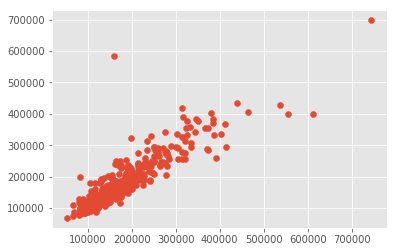

In [171]:
# 横軸：実際の成約価格、縦軸：予測した成約価格で散布図を作成し予測の誤差を確認
plt.scatter(test_y, test_pred_randomf)


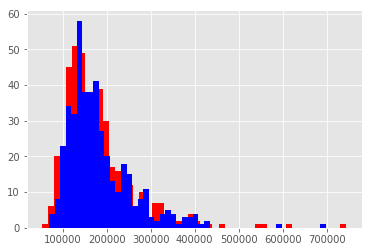

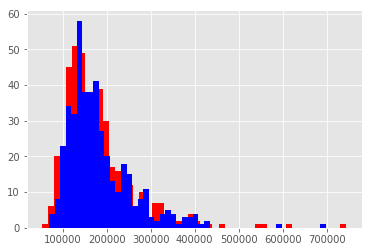

In [173]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
plt.hist(test_y, bins=50, color="red")
plt.hist(test_pred_randomf, bins=50, color="blue")
#---------------------------
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(test_y, bins=50, color='red')
ax.hist(test_pred_randomf, bins=50, color='blue')
fig.show()